<a href="https://colab.research.google.com/github/prachiushah11/Project-Bigmart-Data/blob/main/Prachi_BigMartSales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

**Importing the datasets**

In [ ]:
train = pd.read_csv("bm_Train.csv")
test = pd.read_csv("bm_Test.csv")

# making copies of train and test dataset
train = train.copy()
test = test.copy()

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
# Checking the shape of the training and testing datasets

print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [ ]:
# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

(14204, 12)


**Data Visualization**

*univariate data analysis*

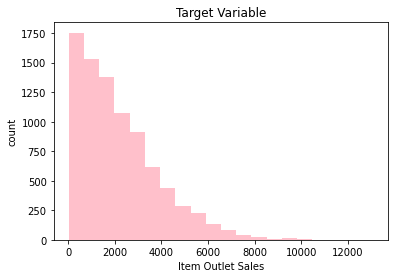

In [ ]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [ ]:
# checking the columns of the train set

print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

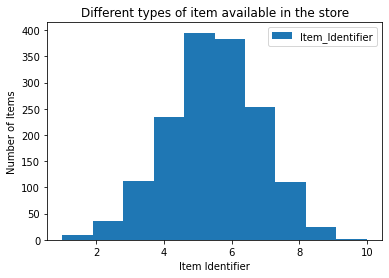

In [ ]:
# we will analyze only the training set

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [ ]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

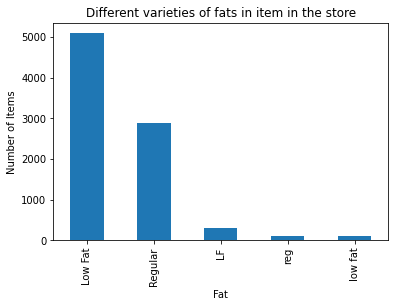

In [ ]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different items in Item Type

train['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

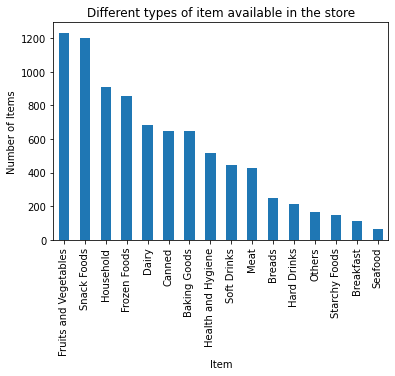

In [ ]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

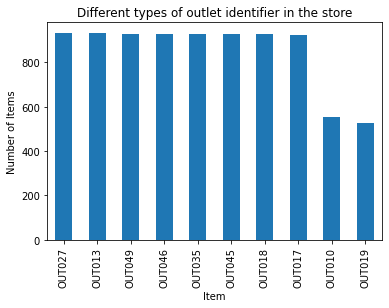

In [ ]:
# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

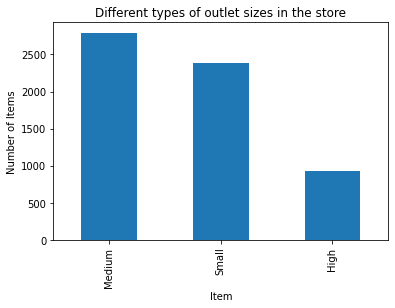

In [ ]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

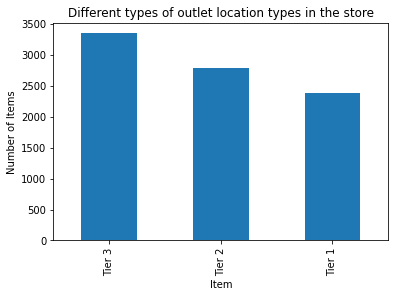

In [ ]:
# we will analyze only the training set

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

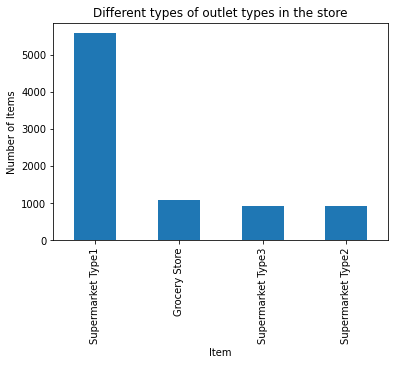

In [ ]:
# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

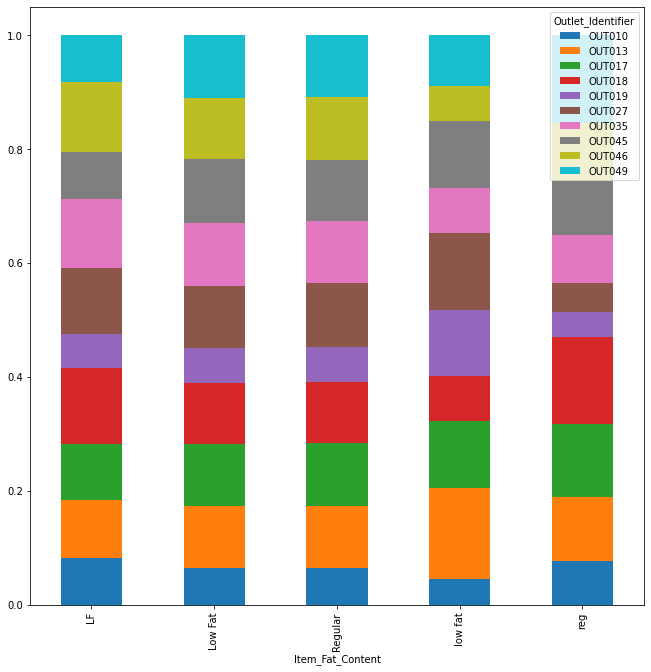

In [ ]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

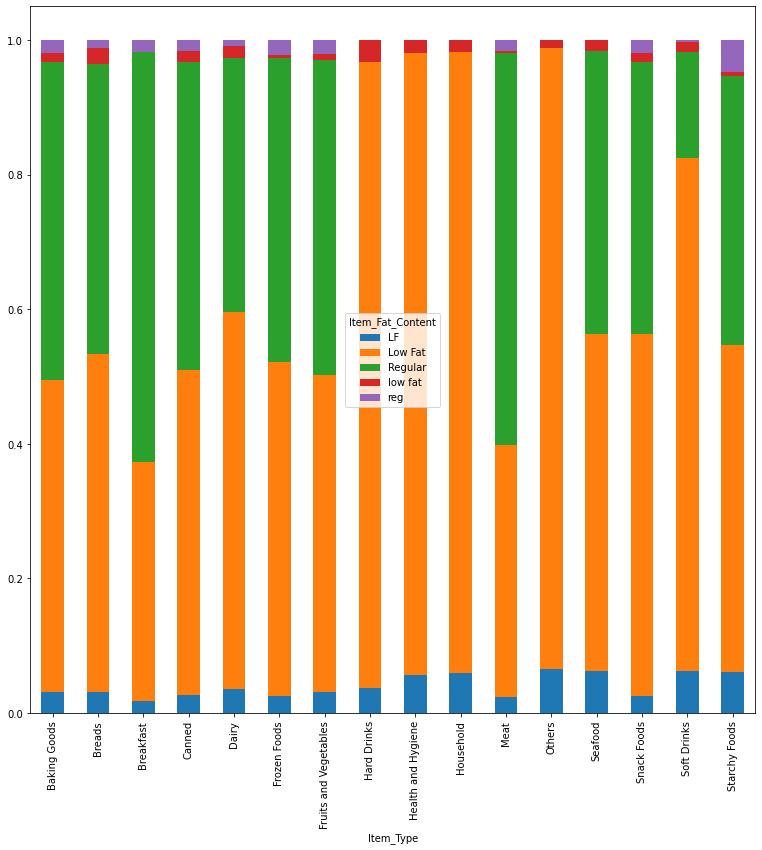

In [ ]:
# fat content vs item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))


**data pre processing**

In [ ]:
# checking unique values in the columns of train dataset

data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
# imputing missing values

data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [ ]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [ ]:
# removing unnecassary columns from the dataset

#data = data.drop('Item_Identifier', axis = 1)

#print(data.shape)

In [ ]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

Text(0, 0.5, 'Frequency')

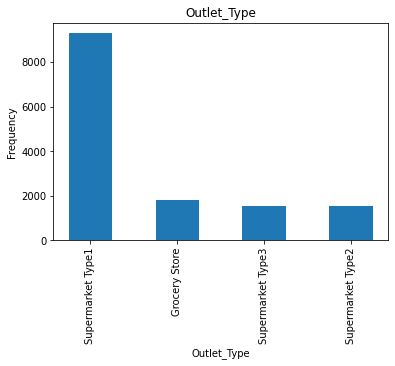

In [ ]:
data['Outlet_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(data['Outlet_Type'].value_counts().index, data['Outlet_Type'].value_counts(), width=0.5, bottom=None, align='center', data=data)
plt.title('Outlet_Type')
plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Type')
plt.ylabel('Frequency')

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,284,0,1097,4,7567,9,4,1,0,1,2540,4
1,0,57,1,1436,14,632,3,8,1,2,2,422,0
2,1,376,0,1172,10,3897,9,4,1,0,1,1639,4
3,1,393,1,0,6,5626,0,3,1,2,0,670,5
4,2,265,0,0,9,848,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,835,6
5677,1,180,1,11820,15,5069,3,8,1,2,2,835,0
5678,2,293,0,8009,8,3196,7,5,1,1,1,835,3
5679,1,354,1,0,3,6626,2,7,1,1,1,835,1


In [ ]:
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

(14204, 47)


In [ ]:
# splitting the data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 46)
(14204,)


In [ ]:
# splitting the dataset into train and test

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 47)
(5681, 47)


In [ ]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 46)
(9942,)
(4262, 46)
(4262,)


**Modelling**

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))




[2106. 1552.  928. ... 1374.  792. 2120.]
RMSE : 1212.223837363071
Variance score: 0.29
Result : 0.2775892438497428


In [ ]:
lr = LinearRegression(normalize=True)

x_train = train.drop(['Item_Outlet_Sales'], axis=1)
y_train = train['Item_Outlet_Sales']

# x_test = test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1).copy()
x_train.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,14,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,14,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,15,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,26,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
x_train=pd.get_dummies(train)

x_train.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,14,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,4,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,14,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,15,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,26,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
y_train.head(5)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
y_train = pd.get_dummies(train)
y_train.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,14,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,4,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,14,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,15,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,26,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
x_test.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
5096,20.00,0.051483,128.8678,2004,9,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1905,9.00,0.086305,168.0816,2009,4,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
848,12.15,0.006787,122.5730,2009,4,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
6422,6.13,0.028482,110.4912,2007,6,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
71,15.85,0.121532,59.2220,1987,26,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
x_test = pd.get_dummies(train)
x_test.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,14,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,4,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,14,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,15,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,26,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
lr_accuracy = round(lr.score(x_train, y_train) *100,2)
print(lr_accuracy)

100.0


**AdaBoost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1369.2779322695208


**XgBoost Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

print("Result :",model.score(x_train, y_train))

[2026.61778354 1513.34845739  882.79783879 ... 1266.24644508  854.0083855
 2198.68609972]
RMSE : 1202.5284849815562
Result : 0.3393650271747979


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))


[2451.788526 1583.678538 1023.347916 ... 1136.207674  687.644898
 2350.400502]
RMSE : 1254.9927103342964
Variance score: 0.24
Result : 0.8858071578357847


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

print("Result :",model.score(x_train, y_train))

[ 958.752  3301.7022  801.6232 ...  958.752   958.752  4234.488 ]
 RMSE :  1670.2073329943219
Result : 1.0


**Support vector machine**

In [ ]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("Result :",model.score(x_train, y_train))

RMSE : 1619.4235677158015
Result : -0.2499797815815814


**Neural Networks**

In [ ]:
import numpy as np

x_train = np.asmatrix(x_train)
x_test = np.asmatrix(x_test)
y_train = np.asmatrix(y_train.T)
y_test = np.asmatrix(y_test.T)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9942, 46)
(4262, 46)
(9942, 1)
(4262, 1)


In [ ]:
import tensorflow as tf

D = x_train.shape[1]

# Creating the placeholders for storing the X and Y variables 
tf_X = tf.placeholder(tf.float32 , [None,D])
tf_Y = tf.placeholder(tf.float32 , [None,1])

# Layer 1 
W1 = tf.Variable(tf.random_normal([D, 20], stddev = 0.01))
b1 = tf.Variable(tf.zeros([20]))
Layer_1 = tf.nn.relu(tf.matmul(tf_X, W1) + b1)

# Layer 2 
W2 = tf.Variable(tf.random_normal([20, 15], stddev = 0.01))
b2 = tf.Variable(tf.zeros([15]))
Layer_2 = tf.nn.relu(tf.matmul(Layer_1, W2) + b2)

# Layer 3
W3 = tf.Variable(tf.random_normal([15, 10], stddev = 0.01))
b3 = tf.Variable(tf.zeros([10]))
Layer_3 = tf.nn.relu(tf.matmul(Layer_2, W3) + b3)

# Output layer
W4 = tf.Variable(tf.random_normal([10, 1] , stddev = 0.01))
b4 = tf.Variable(tf.zeros([1]))
output = tf.add(tf.matmul(Layer_3, W4) , b4)

# Defining our cost function which we have to reduce 
cost = tf.reduce_mean(tf.square(output - tf_Y))

# Defining the function for Gradient Descent 
train = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

Epoch : 0 Cost : 4895451.5
Epoch : 1 Cost : 4894295.0
Epoch : 2 Cost : 4892480.5
Epoch : 3 Cost : 2832973.5
Epoch : 4 Cost : 4.1737935e+24
Epoch : 5 Cost : 1.6694897e+17
Epoch : 6 Cost : 1.6688217e+17
Epoch : 7 Cost : 1.6681545e+17
Epoch : 8 Cost : 1.667487e+17
Epoch : 9 Cost : 1.6668203e+17
Epoch : 10 Cost : 1.6661535e+17
Epoch : 11 Cost : 1.665487e+17
Epoch : 12 Cost : 1.6648209e+17
Epoch : 13 Cost : 1.664155e+17
Epoch : 14 Cost : 1.6634895e+17
Epoch : 15 Cost : 1.662824e+17
Epoch : 16 Cost : 1.662159e+17
Epoch : 17 Cost : 1.6614942e+17
Epoch : 18 Cost : 1.6608295e+17
Epoch : 19 Cost : 1.6601653e+17
Epoch : 20 Cost : 1.6595011e+17
Epoch : 21 Cost : 1.6588375e+17
Epoch : 22 Cost : 1.6581738e+17
Epoch : 23 Cost : 1.6575105e+17
Epoch : 24 Cost : 1.6568474e+17
Epoch : 25 Cost : 1.656185e+17
Epoch : 26 Cost : 1.6555225e+17
Epoch : 27 Cost : 1.6548602e+17
Epoch : 28 Cost : 1.6541986e+17
Epoch : 29 Cost : 1.6535368e+17
Epoch : 30 Cost : 1.6528756e+17
Epoch : 31 Cost : 1.6522145e+17
Epoch : 

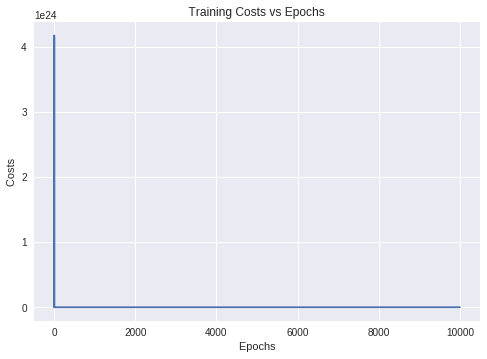

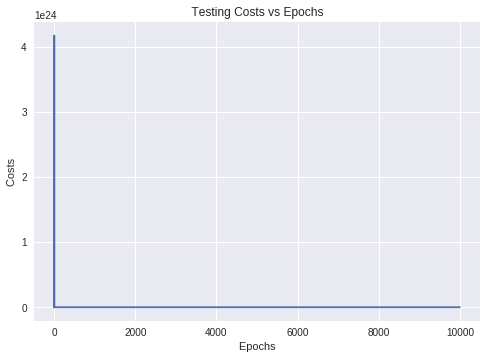

In [ ]:

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    ctrain = []
    ctest = []
    for i in range(10000):
        sess.run(train,feed_dict ={tf_X :x_train ,tf_Y :y_train})

        ctrain.append(sess.run(cost, feed_dict={tf_X :x_train, tf_Y :y_train}))
        ctest.append(sess.run(cost, feed_dict={tf_X :x_test, tf_Y :y_test}))
        print('Epoch :',i,'Cost :',ctrain[i])
        

# visualization of training data
plt.plot(ctrain)
plt.title(" Training Costs vs Epochs ")
plt.xlabel(" Epochs ")
plt.ylabel(" Costs ")
plt.show()

# visualization of testing data
plt.plot(ctest)
plt.title(" Testing Costs vs Epochs ")
plt.xlabel(" Epochs ")
plt.ylabel(" Costs ")
plt.show()

